In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

from IPython.core.display import HTML
css = open('style-notebook.css').read() + open('style-table.css').read()
HTML('<style>{}</style>.'.format(css))

In [2]:
# load the sample data into DataFrame
holidays = pd.DataFrame.from_csv('holidays.csv', index_col=None, encoding='utf-8')

holidays.rename(columns={'holiday':'name', 'holiday_date':'date'}, inplace=True)
holidays.head(2)

,country,date,day_of_week,name,not_national_holiday,notes
0,��land,2014-05-01T00:00:00,Thu,Vappu (May Day),False,NaN
1,��land,2014-05-29T00:00:00,Thu,Ascension Day,False,NaN


In [11]:
# CHECKPOINT 1
holidays.country.value_counts().reset_index().head()

,index,0
0,India,77
1,Malaysia,49
2,Nepal,41
3,Spain,40
4,Cambodia,31


In [12]:
# CHECKPOINT 2
coHoliday = holidays.date.value_counts().reset_index()
coHoliday.columns = ['date', 'frequency']

count = 0
for thisDay in coHoliday.date:
    coHoliday.loc[count, 'name'] = holidays[holidays.date == thisDay].iloc[-1]['name']
    coHoliday.loc[count, 'date'] = thisDay.replace("T00:00:00", "")
    count += 1

coHoliday.head(10)

,date,frequency,name
0,2015-01-01,266,New Year's Day
1,2014-12-25,228,Christmas Day
2,2014-05-01,200,Workers' Day
3,2015-04-03,159,Good Friday
4,2015-04-06,150,Easter Monday
5,2014-12-26,130,Boxing Day
6,2014-07-28,82,Eid al Fitr (End of Ramadan)
7,2014-10-04,75,Eid al Adha (Feast of Sacrifice)
8,2014-08-15,71,Assumption Day
9,2014-06-09,69,Whit Monday


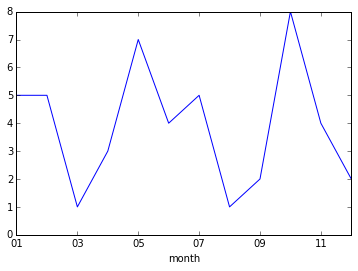

In [22]:
# CHECKPOINT 3
malHoliday = holidays[holidays.country == "Malaysia"].drop_duplicates('date')

for i in malHoliday.index: 
    malHoliday.loc[i, 'month'] = malHoliday.loc[i].date[5:7]

malHoliday.groupby('month').size().plot(ylim=0)

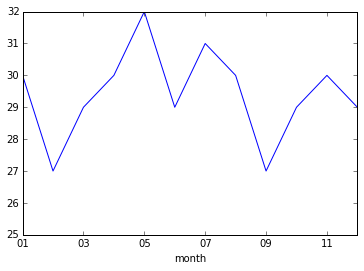

In [18]:
# CHECKPOINT 4
count = 0
for day in coHoliday.date:
    coHoliday.loc[count, 'month'] = day[5:7]
    count += 1
    
coHoliday.groupby('month').size().plot(ylim=25)